# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
url="http://api.openweathermap.org/data/2.5/weather?"
#units=Imperial&APPID=58cdd1ed9f533a78e558533f70a2c05a&q=

unit="imperial"
query_url=f"{url}units={unit}&APPID={api_key}&q="


In [39]:
city_list=[]         
cloudiness=[]    
country=[]      
date=[]          
humidity=[]     
lat=[]        
lng=[]          
max_temp=[]      
wind_speed=[]
record=1
set=1
print('Beginning Data Retrieval\n-------------------------------')
for city in cities:
    try:
        response=requests.get(query_url+city).json()
        city_list.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f'Processing Record {record} of Set {set}| {city}')
        record+=1
        if record>=51:
            record=1
            set+=1
    except:
        print("City not found. Skipping ...")
        
print("-----------------------------\n Data Retreival Complete\n-----------------------------")
   

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1| hilo
Processing Record 2 of Set 1| port elizabeth
Processing Record 3 of Set 1| ribeira grande
Processing Record 4 of Set 1| aklavik
Processing Record 5 of Set 1| porto novo
Processing Record 6 of Set 1| rio gallegos
Processing Record 7 of Set 1| mapiri
Processing Record 8 of Set 1| vaini
Processing Record 9 of Set 1| qaanaaq
Processing Record 10 of Set 1| hithadhoo
Processing Record 11 of Set 1| rikitea
Processing Record 12 of Set 1| east london
Processing Record 13 of Set 1| busselton
Processing Record 14 of Set 1| kaitangata
Processing Record 15 of Set 1| mataura
Processing Record 16 of Set 1| sandur
Processing Record 17 of Set 1| nhulunbuy
Processing Record 18 of Set 1| provideniya
Processing Record 19 of Set 1| manono
Processing Record 20 of Set 1| cape town
Processing Record 21 of Set 1| luderitz
Processing Record 22 of Set 1| fairbanks
Processing Record 23 of Set 1| casablanca
Processing Recor

Processing Record 42 of Set 4| asau
Processing Record 43 of Set 4| nanortalik
Processing Record 44 of Set 4| airai
Processing Record 45 of Set 4| ahipara
Processing Record 46 of Set 4| siocon
Processing Record 47 of Set 4| mettet
Processing Record 48 of Set 4| contamana
Processing Record 49 of Set 4| uray
Processing Record 50 of Set 4| francistown
Processing Record 1 of Set 5| nago
Processing Record 2 of Set 5| morristown
Processing Record 3 of Set 5| maragogi
Processing Record 4 of Set 5| chicama
Processing Record 5 of Set 5| ribeira brava
Processing Record 6 of Set 5| vostok
Processing Record 7 of Set 5| ilulissat
Processing Record 8 of Set 5| khrebtovaya
Processing Record 9 of Set 5| erenhot
Processing Record 10 of Set 5| kloulklubed
Processing Record 11 of Set 5| pangnirtung
Processing Record 12 of Set 5| arecibo
Processing Record 13 of Set 5| te anau
Processing Record 14 of Set 5| kashan
Processing Record 15 of Set 5| puerto ayacucho
City not found. Skipping ...
City not found. Sk

Processing Record 37 of Set 8| katsuura
Processing Record 38 of Set 8| bensonville
Processing Record 39 of Set 8| krasnoselkup
Processing Record 40 of Set 8| hami
Processing Record 41 of Set 8| saint-joseph
Processing Record 42 of Set 8| homa bay
Processing Record 43 of Set 8| preobrazheniye
Processing Record 44 of Set 8| igarka
Processing Record 45 of Set 8| pemberton
City not found. Skipping ...
Processing Record 46 of Set 8| norman wells
Processing Record 47 of Set 8| saint-raymond
Processing Record 48 of Set 8| oberstdorf
Processing Record 49 of Set 8| gallup
Processing Record 50 of Set 8| half moon bay
Processing Record 1 of Set 9| sao luiz gonzaga
Processing Record 2 of Set 9| aksu
Processing Record 3 of Set 9| tevaitoa
Processing Record 4 of Set 9| pinheiro
Processing Record 5 of Set 9| karoi
Processing Record 6 of Set 9| berezovyy
Processing Record 7 of Set 9| gorzow wielkopolski
City not found. Skipping ...
Processing Record 8 of Set 9| churapcha
Processing Record 9 of Set 9| 

In [44]:
### Convert Raw Data to DataFrame
weather_df=pd.DataFrame({"City": city_list, "Cloudiness":cloudiness, "Country":country, "Date":date,
                        "Humidity":humidity, "Lat":lat, "Lng":lng, "Max Temp":max_temp,
                        "Wind Speed": wind_speed, })
weather_df.to_csv("cities.csv")
weather_df.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [45]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1604374005,78,19.73,-155.09,80.60,6.15
1,Port Elizabeth,0,ZA,1604373709,93,-33.92,25.57,64.40,14.99
2,Ribeira Grande,80,PT,1604374005,65,38.52,-28.70,62.28,15.08
3,Aklavik,100,CA,1604373717,84,68.22,-135.01,-0.40,3.36
4,Porto-Novo,20,BJ,1604374005,88,6.50,2.60,78.80,1.12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [53]:
from datetime import date
today = date.today()
d1 = today.strftime("%d/%m/%Y")

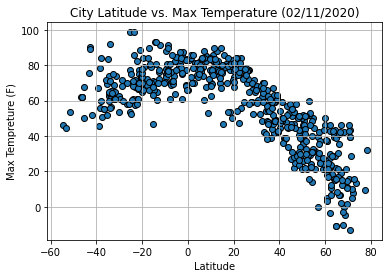

In [54]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Max Tempreture (F)")
plt.grid()
plt.savefig("Latitude vs Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

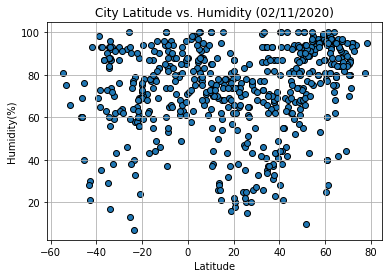

In [55]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolor="black")
plt.title(f"City Latitude vs. Humidity ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.savefig("Latitude vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

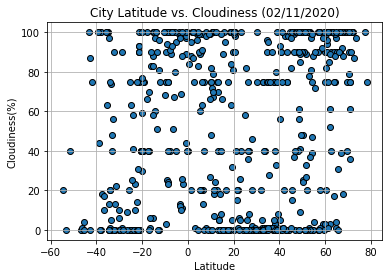

In [56]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("Latitude vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

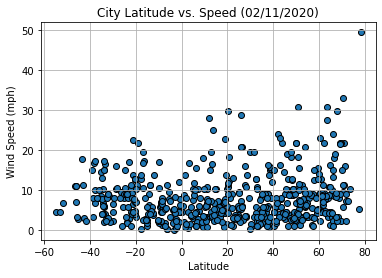

In [57]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolor="black")
plt.title(f"City Latitude vs. Speed ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Latitude vs Wind Speed.png")
plt.show()